# Rainfall estimation from Reflectivity (Z-R)

Author: [Irene Crisologo](https://philippineradarnetwork.wordpress.com)

This notebook shows how to convert the raw reflectivity data to rainfall depth using the R(Z) equation.

Import necessary modules.

In [6]:
%pylab inline
import numpy as np
import pylab as pl
import wradlib as wrl
import seaborn

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


Read the reflectivity data.

In [2]:
data, attrs = wrl.io.read_EDGE_netcdf('../phirad-data/radars/tagaytay/TAG-20120806-131547-02-Z.nc')

In [3]:
data_dBZ = wrl.trafo.idecibel(data)

Assuming that the data is free of clutter and has been corrected for bias (if present), it can be converted to rainfall rate using the following equation:

\begin{equation}
Z = aR^{b}
\end{equation}

where $a=250$ and $b=1.2$ for tropical regimes as suggested by Fulton et al., 1998. Reversing this equation would give us:

\begin{equation}
R = \left ( \frac{Z}{250} \right ) ^{\frac{4}{5}}
\end{equation}

In [4]:
RZ = wrl.zr.z2r(data_dBZ, a=250., b=1.2)

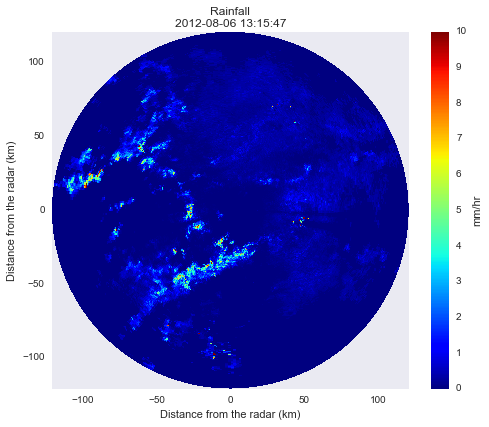

In [5]:
# rain rate
pl.figure(figsize=(8,8))
ax,pm = wrl.vis.plot_ppi(np.ma.masked_less(RZ,0.), r=attrs['r']/1000., vmin=0, vmax=10,
                        cmap=pl.cm.jet)
cb = pl.colorbar(pm, shrink=0.8)
cb.set_label('mm/hr')
pl.xlim((-121,121))
pl.ylim((-121,121))
pl.xlabel('Distance from the radar (km)')
pl.ylabel('Distance from the radar (km)')
pl.title('Rainfall\n' + str(attrs['time']))